In [ ]:
# Librerías
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
plt.style.use("ggplot")
# warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Datos
# ==============================================================================
url = (
    "https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-con-R/"
    "master/datos/datos_groceries.csv"
)
datos = pd.read_csv(url)
datos.shape

(43367, 2)

In [ ]:
# Ítems de la transacción 14
# ==============================================================================
datos.query("id_compra==14")

,id_compra,item
45,14,frankfurter
46,14,rolls/buns
47,14,soda


In [ ]:
# Total de transacciones e ítems (productos)
# ==============================================================================
print(f"Número total de transacciones: {datos['id_compra'].nunique()}")
print(f"Número total de ítems (productos): {datos['item'].nunique()}")

Número total de transacciones: 9835
Número total de ítems (productos): 169


In [ ]:
# Ítems (productos) agrupados por transacción (compra)
# ==============================================================================
datos.groupby('id_compra')['item'].apply(list)

,item
id_compra,
1,"[citrus fruit, semi-finished bread, margarine,..."
2,"[tropical fruit, yogurt, coffee]"
3,[whole milk]
4,"[pip fruit, yogurt, cream cheese, meat spreads]"
5,"[other vegetables, whole milk, condensed milk,..."
...,...
9831,"[sausage, chicken, beef, hamburger meat, citru..."
9832,[cooking chocolate]
9833,"[chicken, citrus fruit, other vegetables, butt..."


,item
count,9835.000000
mean,4.409456
std,3.589385
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
90%,9.000000
max,32.000000


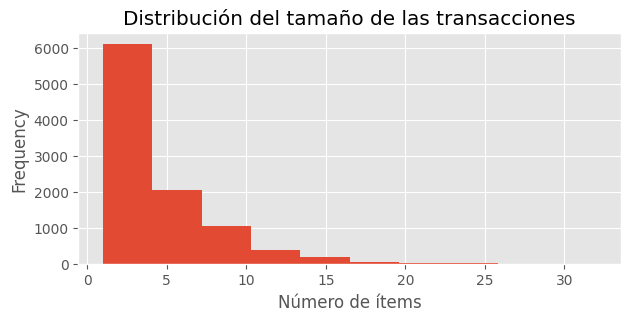

In [ ]:
# Distribución del número de ítems por transacción
# ==============================================================================
display(datos.groupby('id_compra')['item'].size().describe(percentiles=[.25, .5, .75, .9]))

fig, ax = plt.subplots(figsize=(7, 3))
datos.groupby('id_compra')['item'].size().plot.hist(ax=ax)
ax.set_title('Distribución del tamaño de las transacciones');
ax.set_xlabel('Número de ítems');

In [ ]:
# Codificar las transacciones en forma de matriz binaria
# ==============================================================================
# Crear una lista de listas que contenga los ítems de cada transacción
transacciones = datos.groupby('id_compra')['item'].apply(list).to_list()

# Entrenar el objeto TransactionEncoder y transformar los datos
encoder = TransactionEncoder()
transacciones_encoded = encoder.fit(transacciones).transform(transacciones)
transacciones_encoded = pd.DataFrame(transacciones_encoded, columns=encoder.columns_)
transacciones_encoded.head(3)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Porcentaje de transacciones en las que aparece cada producto (top 5)
# ==============================================================================
transacciones_encoded.mean(axis = 0).sort_values(ascending = False).head(5)

,0
whole milk,0.255516
other vegetables,0.193493
rolls/buns,0.183935
soda,0.174377
yogurt,0.139502


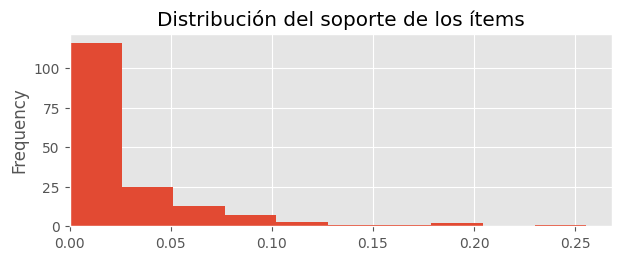

In [ ]:
# Distribución del sopoerte de los items
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 2.5))
transacciones_encoded.mean(axis = 0).plot.hist(ax = ax)
ax.set_xlim(0, )
ax.set_title('Distribución del soporte de los ítems');

In [ ]:
# Codificar las transacciones en forma de matriz binaria
# ==============================================================================
# Crear una lista de listas que contenga los artículos comprados en cada transacción
transacciones = datos.groupby('id_compra')['item'].apply(list).to_list()

# Entrenar el objeto TransactionEncoder y transformar los datos
encoder = TransactionEncoder()
transacciones_encoded = encoder.fit(transacciones).transform(transacciones)
transacciones_encoded = pd.DataFrame(transacciones_encoded, columns=encoder.columns_)
transacciones_encoded.head(3)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Identificación de itemsets frecuentes
# ==============================================================================
soporte = 30 / transacciones_encoded.shape[0]
print(f"Soporte mínimo: {soporte}")

itemsets = apriori(transacciones_encoded, min_support=soporte, use_colnames=True)
itemsets.sort_values(by='support', ascending=False)

Soporte mínimo: 0.003050330452465684


,support,itemsets
133,0.255516,(whole milk)
83,0.193493,(other vegetables)
98,0.183935,(rolls/buns)
111,0.174377,(soda)
134,0.139502,(yogurt)
...,...,...
2173,0.003050,"(other vegetables, whole milk, pastry, root ve..."
2217,0.003050,"(yogurt, whole milk, rolls/buns, whipped/sour ..."
2186,0.003050,"(sausage, other vegetables, whole milk, rolls/..."
2210,0.003050,"(tropical fruit, whole milk, pastry, yogurt)"


In [ ]:
# Top 10 itemsets con mayor soporte
# ==============================================================================
itemsets.sort_values(by='support', ascending=False).head(10)

,support,itemsets
133,0.255516,(whole milk)
83,0.193493,(other vegetables)
98,0.183935,(rolls/buns)
111,0.174377,(soda)
134,0.139502,(yogurt)
9,0.110524,(bottled water)
99,0.108998,(root vegetables)
126,0.104931,(tropical fruit)
107,0.098526,(shopping bags)
104,0.093950,(sausage)


In [ ]:
# Top 10 itemsets con al menos 2 items, ordenados por soporte
# ==============================================================================
itemsets['n_items'] = itemsets['itemsets'].apply(lambda x: len(x))
itemsets.query('n_items >= 2').sort_values('support', ascending=False).head(10)

,support,itemsets,n_items
1076,0.074835,"(other vegetables, whole milk)",2
1171,0.056634,"(whole milk, rolls/buns)",2
1275,0.056024,"(whole milk, yogurt)",2
1185,0.048907,"(whole milk, root vegetables)",2
1055,0.047382,"(other vegetables, root vegetables)",2
1077,0.043416,"(other vegetables, yogurt)",2
1054,0.042603,"(other vegetables, rolls/buns)",2
1263,0.042298,"(whole milk, tropical fruit)",2
1240,0.040061,"(soda, whole milk)",2
1161,0.038332,"(soda, rolls/buns)",2


In [ ]:
# Itemsets frecuentes que contienen el ítem newspapers
# ==============================================================================
mask = itemsets['itemsets'].map(lambda x: 'newspapers' in x)
itemsets.loc[mask].sort_values(by='support', ascending=False)

,support,itemsets,n_items
78,0.079817,(newspapers),1
1017,0.027351,"(newspapers, whole milk)",2
1006,0.019725,"(newspapers, rolls/buns)",2
1002,0.019319,"(other vegetables, newspapers)",2
1018,0.015353,"(newspapers, yogurt)",2
...,...,...,...
896,0.003050,"(newspapers, hygiene articles)",2
957,0.003050,"(newspapers, meat)",2
1876,0.003050,"(sausage, newspapers, rolls/buns)",3
1884,0.003050,"(sausage, newspapers, whole milk)",3


In [ ]:
# Itemsets frecuentes que contienen los items, al menos, newspapers y whole milk
# ==============================================================================
items = {'newspapers', 'whole milk'}
mask = itemsets['itemsets'].map(lambda x: x.issuperset(items))
itemsets.loc[mask].sort_values(by='support', ascending=False).reset_index()

,index,support,itemsets,n_items
0,1017,0.027351,"(newspapers, whole milk)",2
1,1872,0.008338,"(other vegetables, newspapers, whole milk)",3
2,1879,0.007626,"(newspapers, whole milk, rolls/buns)",3
3,1889,0.006609,"(newspapers, whole milk, yogurt)",3
4,1882,0.005796,"(newspapers, whole milk, root vegetables)",3
5,1887,0.005084,"(newspapers, whole milk, tropical fruit)",3
6,1885,0.004779,"(soda, newspapers, whole milk)",3
7,1406,0.004067,"(newspapers, whole milk, brown bread)",3
8,1360,0.004067,"(newspapers, whole milk, bottled water)",3
9,1874,0.003864,"(newspapers, whole milk, pastry)",3


In [ ]:
# Identificación subsets
# ==============================================================================
itemset_a = {'other vegetables', 'whole milk', 'newspapers'}
itemset_b = {'other vegetables', 'whole milk', 'newspapers'}

print(itemset_a.issubset(itemset_b))
print(itemset_b.issuperset(itemset_a))

True
True


In [ ]:
# Identificación de itemsets frecuentes
# ==============================================================================
soporte = 30 / transacciones_encoded.shape[0]
itemsets_frecuentes = apriori(transacciones_encoded, min_support=soporte, use_colnames=True)

# Crear reglas de asociación (confianza mínima del 70% para que una regla sea selecionada)
# ==============================================================================
confianza = 0.7
reglas = association_rules(itemsets_frecuentes, metric="confidence", min_threshold=confianza)

print(f"Número de reglas generadas: {len(reglas)}")
print(f"Confianza mínima: {reglas['confidence'].min()}")
print(f"Confianza máxima: {reglas['confidence'].max()}")
reglas.sort_values(by='confidence').head(5)

Número de reglas generadas: 19
Confianza mínima: 0.7000000000000001
Confianza máxima: 0.8857142857142858


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
12,"(other vegetables, whipped/sour cream, domesti...",(whole milk),0.005084,0.255516,0.003559,0.700000,2.739554,1.0,0.002260,2.481613,0.638222,0.013845,0.597036,0.356964
14,"(root vegetables, tropical fruit, yogurt)",(whole milk),0.008134,0.255516,0.005694,0.700000,2.739554,1.0,0.003616,2.481613,0.640185,0.022073,0.597036,0.361142
1,"(coffee, butter)",(whole milk),0.004779,0.255516,0.003355,0.702128,2.747881,1.0,0.002134,2.499339,0.639138,0.013059,0.599894,0.357630
4,"(butter, pork)",(whole milk),0.005491,0.255516,0.003864,0.703704,2.754049,1.0,0.002461,2.512633,0.640415,0.015026,0.602011,0.359413
16,"(citrus fruit, other vegetables, tropical frui...",(whole milk),0.004474,0.255516,0.003152,0.704545,2.757344,1.0,0.002009,2.519792,0.640196,0.012272,0.603142,0.358441


In [ ]:
# Seleccionar reglas que tienen "other vegetables" en el consecuente
# ==============================================================================
mask = reglas['consequents'].map(lambda x: 'other vegetables' in x)
reglas.loc[mask]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
10,"(citrus fruit, tropical fruit, root vegetables)",(other vegetables),0.005694,0.193493,0.004474,0.785714,4.060694,1.0,0.003372,3.763701,0.758053,0.022977,0.734304,0.404418
13,"(whipped/sour cream, tropical fruit, root vege...",(other vegetables),0.004575,0.193493,0.003355,0.733333,3.789981,1.0,0.002470,3.024403,0.739530,0.017232,0.669356,0.375337
17,"(citrus fruit, whole milk, tropical fruit, roo...",(other vegetables),0.003559,0.193493,0.003152,0.885714,4.577509,1.0,0.002463,7.056940,0.784332,0.016256,0.858296,0.451002


In [ ]:
# Antecedentes de las reglas que tienen "other vegetables" en el consecuente
# ==============================================================================
antecedents = reglas.loc[mask, 'antecedents'].to_list()
set().union(*antecedents)

{'citrus fruit',
 'root vegetables',
 'tropical fruit',
 'whipped/sour cream',
 'whole milk'}

In [ ]:
# Crear una columna con los ítems que forman parte del antecedente y el consecuente
# ======================================================================================
reglas['items'] = reglas[['antecedents', 'consequents']].apply(lambda x: set().union(*x), axis=1)
reglas.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,items
0,"(yogurt, baking powder)",(whole milk),0.004575,0.255516,0.003254,0.711111,2.783039,1.0,0.002085,2.577060,0.643626,0.012668,0.611961,0.361922,"{yogurt, whole milk, baking powder}"
1,"(coffee, butter)",(whole milk),0.004779,0.255516,0.003355,0.702128,2.747881,1.0,0.002134,2.499339,0.639138,0.013059,0.599894,0.357630,"{coffee, butter, whole milk}"
2,"(curd, butter)",(whole milk),0.006812,0.255516,0.004881,0.716418,2.803808,1.0,0.003140,2.625286,0.647755,0.018957,0.619089,0.367759,"{curd, butter, whole milk}"


In [ ]:
# Filtrar reglas
# ==============================================================================
seleccion_items = {'citrus fruit', 'root vegetables', 'tropical fruit',
                   'whole milk', 'other vegetables'}
mask = reglas['items'].map(lambda x: x.issubset(seleccion_items))
reglas.loc[mask]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,items
10,"(citrus fruit, tropical fruit, root vegetables)",(other vegetables),0.005694,0.193493,0.004474,0.785714,4.060694,1.0,0.003372,3.763701,0.758053,0.022977,0.734304,0.404418,"{citrus fruit, other vegetables, tropical frui..."
16,"(citrus fruit, other vegetables, tropical frui...",(whole milk),0.004474,0.255516,0.003152,0.704545,2.757344,1.0,0.002009,2.519792,0.640196,0.012272,0.603142,0.358441,"{other vegetables, tropical fruit, citrus frui..."
17,"(citrus fruit, whole milk, tropical fruit, roo...",(other vegetables),0.003559,0.193493,0.003152,0.885714,4.577509,1.0,0.002463,7.056940,0.784332,0.016256,0.858296,0.451002,"{other vegetables, tropical fruit, citrus frui..."


In [ ]:
# Identificación de itemsets (2 items) frecuentes
# ==============================================================================
soporte = 30 / transacciones_encoded.shape[0]
itemsets_frecuentes = apriori(
                          transacciones_encoded,
                          min_support  = soporte,
                          use_colnames = True,
                          max_len      = 2
                      )

In [ ]:
# Calcular lift base
# ==============================================================================
lift = 0
reglas = association_rules(itemsets_frecuentes, metric="lift", min_threshold=lift)

print(f"Número de reglas generadas: {len(reglas)}")
print(f"Lift medio: {reglas['lift'].mean()}")
print(f"Lift mediano: {reglas['lift'].median()}")

Número de reglas generadas: 2280
Lift medio: 1.644958572425791
Lift mediano: 1.5504543534185435


In [ ]:
# Crear reglas de asociación (lift mínimo de 1.6)
# ==============================================================================
lift = 1.6
reglas = association_rules(itemsets_frecuentes, metric="lift", min_threshold=lift)

print(f"Número de reglas generadas: {len(reglas)}")
print(f"Lift mínimo: {reglas['lift'].min()}")
print(f"Lift máximo: {reglas['lift'].max()}")
reglas.sort_values(by='lift').head(3)

Número de reglas generadas: 1044
Lift mínimo: 1.602248197776239
Lift máximo: 11.421437695970273


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
363,(frozen vegetables),(coffee),0.048094,0.058058,0.004474,0.093023,1.602248,1.0,0.001682,1.038551,0.394868,0.044000,0.037120,0.085041
362,(coffee),(frozen vegetables),0.058058,0.048094,0.004474,0.077058,1.602248,1.0,0.001682,1.031383,0.399045,0.044000,0.030428,0.085041
929,(yogurt),(pot plants),0.139502,0.017285,0.003864,0.027697,1.602341,1.0,0.001452,1.010708,0.436855,0.025266,0.010595,0.125613


In [ ]:
# Filtrar por confianza mínima del 50%
# ==============================================================================
confianza = 0.5
reglas = reglas[reglas['confidence'] >= confianza]

print(f"Número de reglas generadas: {len(reglas)}")
print(f"Confianza mínima: {reglas['confidence'].min()}")
print(f"Confianza máxima: {reglas['confidence'].max()}")
reglas.sort_values(by='confidence').head(3)

Número de reglas generadas: 5
Confianza mínima: 0.5
Confianza máxima: 0.6428571428571428


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
870,(specialty cheese),(other vegetables),0.008541,0.193493,0.004270,0.500000,2.584078,1.0,0.002618,1.613015,0.618296,0.021594,0.380043,0.261035
856,(rice),(other vegetables),0.007626,0.193493,0.003965,0.520000,2.687441,1.0,0.002490,1.680224,0.632724,0.020113,0.404841,0.270247
37,(baking powder),(whole milk),0.017692,0.255516,0.009253,0.522989,2.046793,1.0,0.004732,1.560725,0.520642,0.035054,0.359272,0.279600


In [ ]:
# Recomendaciones 1 a 1
# ==============================================================================
antecedente = 'rice'

mask = reglas['antecedents'].map(lambda x: antecedente in x)
reglas.loc[mask]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
856,(rice),(other vegetables),0.007626,0.193493,0.003965,0.520000,2.687441,1.0,0.002490,1.680224,0.632724,0.020113,0.404841,0.270247
944,(rice),(whole milk),0.007626,0.255516,0.004677,0.613333,2.400371,1.0,0.002729,1.925390,0.587881,0.018096,0.480625,0.315819


In [ ]:
#!pip install pyvis

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from pyvis.network import Network

# --- 1. Cargar datos ---
datos = pd.read_csv(url)

# --- 2. Transformar en formato de transacciones ---
# Agrupamos los productos por cliente (id_compra)
dataset = datos.groupby('id_compra')['item'].apply(list).tolist()

# --- 3. Codificar datos ---
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# --- 4. Calcular itemsets y reglas ---
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# --- 5. Crear red interactiva ---
# Usa notebook=True para Jupyter/Colab o cdn_resources='in_line' si se muestra vacío
net = Network(height="700px", width="100%", directed=True, notebook=True)

# --- 6. Agregar nodos ---
for _, row in rules.iterrows():
    for antecedent in row['antecedents']:
        net.add_node(antecedent, label=antecedent, color="#FFD966", title=f"Soporte: {round(row['support'],2)}")
    for consequent in row['consequents']:
        net.add_node(consequent, label=consequent, color="#F4B183", title=f"Soporte: {round(row['support'],2)}")

# --- 7. Agregar aristas (reglas) ---
for _, row in rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            net.add_edge(
                antecedent,
                consequent,
                value=row['lift'],  # grosor de la línea
                title=f"Soporte: {round(row['support'],2)}<br>"
                      f"Confianza: {round(row['confidence'],2)}<br>"
                      f"Lift: {round(row['lift'],2)}"
            )

# --- 8. Configurar opciones visuales ---
net.set_options('''
var options = {
  "nodes": {
    "shape": "dot",
    "scaling": { "min": 10, "max": 50 },
    "font": { "size": 16 }
  },
  "edges": {
    "arrows": { "to": { "enabled": true } },
    "color": { "color": "gray", "highlight": "red" },
    "smooth": false
  },
  "physics": {
    "forceAtlas2Based": { "gravitationalConstant": -60, "centralGravity": 0.01 },
    "solver": "forceAtlas2Based"
  }
}
''')

# --- 9. Exportar gráfico interactivo ---
net.show("reglas_groceries_interactivo.html")

reglas_groceries_interactivo.html


| Elemento            | Significado                                        |
| ------------------- | -------------------------------------------------- |
|  Nodos amarillos  | **Antecedentes** (productos que preceden la regla) |
|  Nodos naranjas   | **Consecuentes** (productos asociados)             |
|  Flechas          | Dirección de la regla (A → B)                      |
|  Grosor de arista | Valor del **lift** (fuerza de asociación)          |
|  Tooltip          | Soporte, confianza y lift de cada regla            |
